## training on a dummy dataset

In [2]:
import numpy as np

### now we create an X an y sets

In [3]:
X_values=[i for i in range(20)]
X_train=np.array(X_values,dtype=np.float32) #creating a train np array set
X_train=X_train.reshape(-1,1) #for avoid the error when we change the array to tensor

In [4]:
y_values=[2*i+1 for i in X_values] #creating values on y for each X (y=2x+1)
y_train=np.array(y_values,dtype=np.float32)
y_train=y_train.reshape(-1,1)

In [5]:
X_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.]], dtype=float32)

In [6]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.],
       [23.],
       [25.],
       [27.],
       [29.],
       [31.],
       [33.],
       [35.],
       [37.],
       [39.]], dtype=float32)

In [7]:
import torch
from torch.autograd import Variable #import the library for linear regression on pytorch

In [18]:
#creating class for linear regression
class linearRegression(torch.nn.Module):
    def __init__(self,inputSize,outputSize):
        super(linearRegression,self).__init__()
        self.linear=torch.nn.Linear(inputSize,outputSize)

    def forward(self,X):
        out=self.linear(X)
        return out

In [19]:
#instatiate the model
inputDim=1
outputDim=1
learningRate=0.02

model=linearRegression(inputDim,outputDim)

In [20]:
model

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [21]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [26]:
epochs = 100
for epoch in range(epochs):
    
        inputs = Variable(torch.from_numpy(X_train))
        labels = Variable(torch.from_numpy(y_train))

# Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
optimizer.zero_grad()

# get output from the model, given the inputs
outputs = model(inputs)

# get loss for the predicted output
loss = criterion(outputs, labels)
print(loss)
# get gradients w.r.t to parameters
loss.backward()

# update parameters
optimizer.step()

print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(927.1019, grad_fn=<MseLossBackward0>)
epoch 99, loss 927.1018676757812


[[  1.8654412]
 [ 14.6741495]
 [ 27.482857 ]
 [ 40.291565 ]
 [ 53.100273 ]
 [ 65.90898  ]
 [ 78.71769  ]
 [ 91.5264   ]
 [104.335106 ]
 [117.143814 ]
 [129.95253  ]
 [142.76123  ]
 [155.56995  ]
 [168.37866  ]
 [181.18736  ]
 [193.99606  ]
 [206.80478  ]
 [219.6135   ]
 [232.4222   ]
 [245.2309   ]]


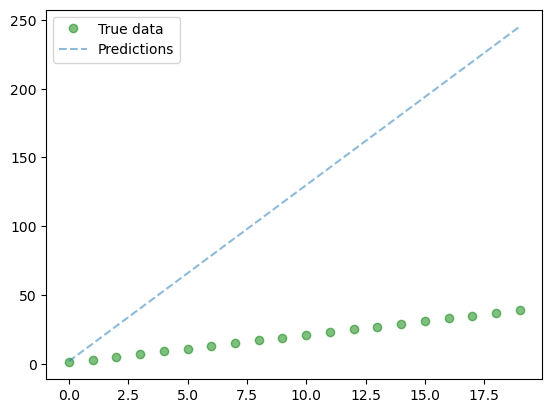

In [31]:
with torch.no_grad(): # we don't need gradients in the testing phase
    
    predicted = model(Variable(torch.from_numpy(X_train))).data.numpy()
    print(predicted)

import matplotlib.pyplot as plt

plt.clf()
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')


this is a simple tutorial for linear regression model on pytorch